In [1]:
import dataclasses

import jax

from openpi.models import model as _model
from openpi.policies import droid_policy
from openpi.policies import policy_config as _policy_config
from openpi.shared import download
from openpi.training import config as _config
from openpi.training import data_loader as _data_loader

# Policy inference

The following example shows how to create a policy from a checkpoint and run inference on a dummy example.

# Working with a live model


The following example shows how to create a live model from a checkpoint and compute training loss. First, we are going to demonstrate how to do it with fake data.


In [2]:
config = _config.get_config("pi0_opaque_low_mem_finetune")

checkpoint_dir = download.maybe_download("/media/zeyu/082b281d-ee9b-bc4b-be11-a1acf8642a75/DockerCode/openpi/checkpoints/pi0_opaque_low_mem_finetune/train0810/20000")
key = jax.random.key(0)

# Create a model from the checkpoint.
# model = config.model.load(_model.restore_params(checkpoint_dir / "params"))

# # We can create fake observations and actions to test the model.
# obs, act = config.model.fake_obs(), config.model.fake_act()

# # Sample actions from the model.
# loss = model.compute_loss(key, obs, act)
# print("Loss shape:", loss.shape)

Now, we are going to create a data loader and use a real batch of training data to compute the loss.

In [3]:
# Reduce the batch size to reduce memory usage.
config = dataclasses.replace(config, batch_size=1)

# Load a single batch of data. This is the same data that will be used during training.
# NOTE: In order to make this example self-contained, we are skipping the normalization step
# since it requires the normalization statistics to be generated using `compute_norm_stats`.
loader = _data_loader.create_data_loader(config, num_batches=1000, skip_norm_stats=True)

Resolving data files:   0%|          | 0/45 [00:00<?, ?it/s]

In [4]:
data_iter = iter(loader)

In [5]:
# Create a model from the checkpoint.
model = config.model.load(_model.restore_params(checkpoint_dir / "params"))

In [5]:
total_loss = []
for i in range(130):
    obs, act = next(data_iter)

In [6]:
obs.state

Array([[ 0.180929  ,  0.285763  ,  0.09967   ,  3.074133  ,  0.14975755,
         3.1352837 , -2.158     ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [15]:
act[0,11]

Array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -2.736,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],      dtype=float32)

In [7]:
obs.state

Array([[ 0.14174493, -1.1227123 , -0.91190654,  0.5641826 ,  0.09723206,
         1.6130959 , -0.30481562,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [6]:
total_loss = []
for i in range(138):
    obs, act = next(data_iter)
    # Sample actions from the model.
    loss = model.compute_loss(key, obs, act)
    total_loss.append(loss)
    print(f"Loss shape for batch {i}:", loss.mean())

Loss shape for batch 0: 0.012792807
Loss shape for batch 1: 0.012809234
Loss shape for batch 2: 0.0121276565
Loss shape for batch 3: 0.012821914
Loss shape for batch 4: 0.013838255
Loss shape for batch 5: 0.013382771
Loss shape for batch 6: 0.014889798
Loss shape for batch 7: 0.014213528
Loss shape for batch 8: 0.014653834
Loss shape for batch 9: 0.014680592
Loss shape for batch 10: 0.013074605
Loss shape for batch 11: 0.013230385
Loss shape for batch 12: 0.014068116
Loss shape for batch 13: 0.013072871
Loss shape for batch 14: 0.013569169
Loss shape for batch 15: 0.0121512795
Loss shape for batch 16: 0.0138296
Loss shape for batch 17: 0.014178987
Loss shape for batch 18: 0.016168145
Loss shape for batch 19: 0.015738497
Loss shape for batch 20: 0.015070244
Loss shape for batch 21: 0.013200468
Loss shape for batch 22: 0.012433031
Loss shape for batch 23: 0.009838232
Loss shape for batch 24: 0.009501921
Loss shape for batch 25: 0.007637659
Loss shape for batch 26: 0.008469379
Loss shape 

In [15]:
import numpy as np
arr = np.stack(total_loss, axis=0)

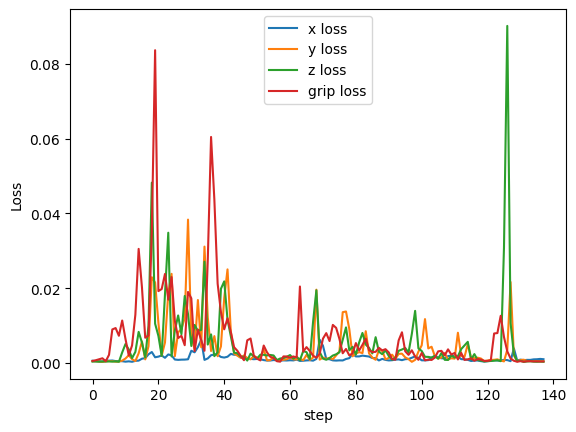

In [22]:
arr[:,0,0]
#draw graph for x, y and z loss separately
import matplotlib.pyplot as plt
plt.plot(arr[:,0,0], label='x loss')
plt.plot(arr[:,0,1], label='y loss')
plt.plot(arr[:,0,2], label='z loss')
plt.plot(arr[:,0,6], label='grip loss')
plt.xlabel('step')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# save arr to npy file
np.save('debug_test_loss_pi0_opaque_low_mem_finetune.npy', arr)

In [1]:
import json, numpy as np

# ==== 1) Hardcoded data (N x 7) ====
DATA = np.array([
[ 0.17178754,  0.31913684,  0.34355346,  2.74867346,  0.12078963,  2.81269217, -2.76262991],
[ 0.1721505 ,  0.31929852,  0.34239829,  2.7136637 ,  0.12040936,  2.80001037, -2.76619905],
[ 0.17213198,  0.31843461,  0.34215826,  2.72242391,  0.1204648 ,  2.7974778 , -2.76957132],
[ 0.17201831,  0.31793377,  0.34195217,  2.727437  ,  0.12043596,  2.80176068, -2.76803955],
[ 0.17195892,  0.31805407,  0.34204224,  2.72492145,  0.12055034,  2.79565918, -2.76536551],
[ 0.17198609,  0.31781729,  0.34228471,  2.72278056,  0.12069532,  2.79636316, -2.76750208],
[ 0.17192556,  0.31776311,  0.34213622,  2.73051484,  0.12083331,  2.803269  , -2.76648917],
[ 0.17190534,  0.31766975,  0.34244792,  2.7293241 ,  0.1208913 ,  2.81422638, -2.76573341],
[ 0.17179105,  0.31733405,  0.34254133,  2.71511377,  0.12113998,  2.80724616, -2.76481733],
[ 0.17174414,  0.31783697,  0.34265948,  2.7205985 ,  0.12130364,  2.80780218, -2.76935824],
[ 0.1717558 ,  0.31767883,  0.34223702,  2.72579628,  0.12122704,  2.80524143, -2.77095671],
[ 0.17159715,  0.31737532,  0.34237329,  2.71793116,  0.12137967,  2.80073242, -2.77144672],
[ 0.17144948,  0.31735989,  0.34263219,  2.72366491,  0.12140753,  2.80397588, -2.77165128],
[ 0.17119415,  0.31687399,  0.34366864,  2.71669422,  0.12188598,  2.81564076, -2.77293672],
[ 0.17071982,  0.31656869,  0.34500578,  2.71730785,  0.12267358,  2.81852087, -2.77056399],
[ 0.16946439,  0.31617687,  0.34862285,  2.70453749,  0.12513423,  2.8192678 , -2.7685738 ],
[ 0.16780498,  0.31744117,  0.3555933 ,  2.67938861,  0.13007137,  2.82208654, -2.76839169],
[ 0.16610994,  0.31969691,  0.36588008,  2.67391323,  0.13767169,  2.83606808, -2.76848311],
[ 0.16441098,  0.32216072,  0.37580617,  2.6704934 ,  0.14511835,  2.84179383, -2.77058854],
[ 0.16212473,  0.32779557,  0.38450199,  2.66420522,  0.15203593,  2.83266856, -2.77104071],
[ 0.15971174,  0.33841385,  0.39259004,  2.61937373,  0.15782172,  2.84690418, -2.77827454],
[ 0.15883891,  0.35426902,  0.39331565,  2.60964137,  0.16106999,  2.87039543, -2.7755481 ],
[ 0.15930514,  0.3754391 ,  0.38401303,  2.61084428,  0.16239479,  2.91167531, -2.7725866 ],
[ 0.15990194,  0.39458294,  0.36906072,  2.61923263,  0.16049767,  2.95046076, -2.76931958],
[ 0.15966844,  0.40651975,  0.3600867 ,  2.66272002,  0.15894905,  2.97977245, -2.76960916],
[ 0.15851994,  0.41434112,  0.36128868,  2.66540308,  0.16452722,  2.9556541 , -2.77126744],
[ 0.15799145,  0.42027095,  0.36459295,  2.6881828 ,  0.17359201,  2.96271836, -2.77299627],
[ 0.15795105,  0.42408481,  0.36540164,  2.72215549,  0.18148062,  2.92613642, -2.77199353],
[ 0.15824629,  0.42739687,  0.37033128,  2.74765374,  0.19457625,  2.92867331, -2.77283101],
[ 0.1589209 ,  0.43037136,  0.37211237,  2.80360097,  0.20688451,  2.95924957, -2.77140275],
[ 0.16049095,  0.43790982,  0.36831445,  2.84059793,  0.21941229,  2.97006448, -2.76811576],
[ 0.16335443,  0.44658659,  0.35945164,  2.867714  ,  0.23142006,  2.98914485, -2.76683499],
[ 0.16754807,  0.45409263,  0.3474117 ,  2.92204866,  0.2439769 ,  2.94503814, -2.7610472 ],
[ 0.17317971,  0.46436314,  0.33799097,  2.94596089,  0.26767125,  2.96762404, -2.75449366],
[ 0.17803737,  0.46590971,  0.32579393,  2.95054086,  0.28760073, -3.19750312, -2.7663491 ],
[ 0.18026126,  0.47391454,  0.31507522,  2.95421858,  0.30004748, -3.13968996, -2.76907105],
[ 0.18135538,  0.4811517 ,  0.30578677,  2.94636488,  0.30754399, -3.10310837, -2.76618961],
[ 0.18223996,  0.48714595,  0.29800947,  2.93556584,  0.31286349, -3.09591971, -2.76173591],
[ 0.18224735,  0.49200233,  0.29031084,  2.95906721,  0.31385697, -3.0708582 , -2.76812089],
[ 0.18246991,  0.49692058,  0.28286104,  2.98370199,  0.31869979, -3.03816352, -2.76294358],
[ 0.18236057,  0.5019427 ,  0.27560853,  2.96839687,  0.32041521, -3.05508758, -2.75987435],
[ 0.182135  ,  0.5067165 ,  0.26684477,  2.9911304 ,  0.31855195, -3.04225792, -2.76049087],
[ 0.18299677,  0.51247275,  0.25958137,  2.96744426,  0.31907574, -3.10571067, -2.75975315],
[ 0.18431233,  0.5166085 ,  0.25477962,  2.98166174,  0.3199853 , -3.0788476 , -2.76137415],
[ 0.18570599,  0.52033085,  0.24964311,  2.98351556,  0.32013192, -3.12025152, -2.75877752],
[ 0.18687969,  0.52209427,  0.23998157,  3.01820404,  0.31226798, -3.12741733, -2.75917996],
[ 0.18843241,  0.5208305 ,  0.22704841,  3.05691115,  0.29446392, -3.1607253 , -2.75316443],
[ 0.18928675,  0.51878971,  0.21437466,  3.08278717,  0.27616665, -3.1828325 , -2.75781628],
[ 0.19077326,  0.51728262,  0.2048227 ,  3.06511221,  0.26322734, -3.21786819, -2.75812088],
[ 0.19291192,  0.5156272 ,  0.19731872,  3.09088764,  0.25290684, -3.21894955, -2.75768885],
], dtype=np.float64)

In [2]:
import numpy as np

# Vector to subtract (xy... up to the 6th column). Keep the last column unchanged.
v = np.array([0.172454, 0.318198, 0.341037, 2.71678279, 0.12151298, 2.79472303, -2.76], dtype=float)

# Subtract from all rows, but not the last element: use a mask so the last column subtracts 0
mask = np.array([1, 1, 1, 1, 1, 1, 0], dtype=float)

DATA_sub = DATA - v * mask  # shape preserved

In [4]:
import json, numpy as np

# === path to your stats JSON ===
json_path = "/media/zeyu/082b281d-ee9b-bc4b-be11-a1acf8642a75/DockerCode/openpi/examples/assets/pi0_opaque_low_mem_finetune/xX-Conan-Xx/pick_up_opaque_bottle/norm_stats.json"

# === load action stats (mean/std) ===
with open(json_path, "r") as f:
    js = json.load(f)

act_stats = js["norm_stats"]["actions"]
mu  = np.asarray(act_stats["mean"], dtype=float)   # shape (7,)
std = np.asarray(act_stats["std"],  dtype=float)   # shape (7,)

# === z-score normalize (all 7 columns) ===
eps = 1e-8
DATA_norm = (DATA_sub - mu) / (std + eps)

In [22]:
import os, numpy as np
from datasets import load_dataset

REPO_ID = "xX-Conan-Xx/pick_up_opaque_bottle"
HF_TOKEN = os.getenv("HF_TOKEN")  # set if the repo is private

# 1) Load all parquet files from the dataset repo
ds = load_dataset(
    "parquet",
    data_files={"train": f"hf://datasets/{REPO_ID}/**/*.parquet"},
    split="train",
    token=HF_TOKEN,
)
print(ds)

# 2) Find the 'state' column (flatten if nested like 'observation.state')
if "state" in ds.column_names:
    state_col = "state"
else:
    ds = ds.flatten()
    # pick a column that ends with 'state' and has length-7 vectors
    candidates = [c for c in ds.column_names if c.endswith("state")]
    if not candidates:
        raise KeyError(f"No 'state' column found. Columns: {ds.column_names}")
    # choose the first that looks like 7-D
    state_col = None
    for c in candidates:
        val = ds[c][0]
        if isinstance(val, (list, tuple)) and len(val) == 7:
            state_col = c
            break
    if state_col is None:
        raise ValueError(f"Found {candidates} but none look like 7-D 'state' vectors.")

print("Using state column:", state_col)

# 3) Stack states to (N,7)
STATES = np.asarray(ds[state_col], dtype=np.float64)  # list[list] -> np.array (N,7)




Resolving data files:   0%|          | 0/45 [00:00<?, ?it/s]

Dataset({
    features: ['image', 'wrist_image', 'state', 'actions', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index'],
    num_rows: 4850
})
Using state column: state


In [23]:
def actions_from_states(states, *, keep_last="current", time_axis=0):
    """
    states: array with shape (..., T, 7) if time_axis=-2 or (T, 7) if time_axis=0
            last dim is 7 features; only first 6 get differenced.
    keep_last: "current" -> use states[t, -1] as the last action element
               "next"    -> use states[t+1, -1]
    time_axis: which axis is time (default 0)
    Returns: actions with shape identical to states except time reduced by 1 on time_axis.
    """
    s = np.asarray(states)
    assert s.shape[-1] == 7, f"Expected last dim = 7, got {s.shape[-1]}"

    # move time axis to -2 for easy diff
    s = np.moveaxis(s, time_axis, -2)          # shape (..., T, 7)
    # first 6 dims deltas between t+1 and t
    delta = np.diff(s[..., :6], axis=-2)       # (..., T-1, 6)

    if keep_last == "current":
        last = s[..., :-1, 6][..., None]       # (..., T-1, 1), take at time t
    elif keep_last == "next":
        last = s[..., 1:, 6][..., None]        # (..., T-1, 1), take at time t+1
    else:
        raise ValueError("keep_last must be 'current' or 'next'")

    actions = np.concatenate([delta, last], axis=-1)   # (..., T-1, 7)
    # move time axis back
    actions = np.moveaxis(actions, -2, time_axis)
    return actions

In [24]:
REAL_ACTIONS = actions_from_states(STATES, keep_last="current", time_axis=0)  # shape (N-1, 7)

In [25]:
REAL_ACTIONS_norm = (REAL_ACTIONS - mu) / (std + eps)

In [28]:
REAL_ACTIONS_norm[:50]

array([[-2.51350912e-01,  4.32058626e-01,  3.56818647e-01,
         1.50434067e-02,  3.88299416e-02,  7.54628064e-02,
        -1.07077508e+00],
       [-2.51350912e-01,  4.32058626e-01,  3.56818647e-01,
         1.50434067e-02,  3.88299416e-02,  7.54628064e-02,
        -1.07077508e+00],
       [-2.51350912e-01,  4.32058626e-01,  3.56818647e-01,
         1.50434067e-02,  3.88299416e-02,  7.54628064e-02,
        -1.07077508e+00],
       [-2.51350912e-01,  4.32058626e-01,  3.56818647e-01,
         1.50434067e-02,  3.88299416e-02,  7.54628064e-02,
        -1.07077508e+00],
       [-2.51350912e-01,  4.32058626e-01,  3.56818647e-01,
         1.50434067e-02,  3.88299416e-02,  7.54628064e-02,
        -1.07077508e+00],
       [-2.51350912e-01,  4.32058626e-01,  3.56818647e-01,
         1.50434067e-02,  3.88299416e-02,  7.54628064e-02,
        -1.07077508e+00],
       [-2.51350912e-01,  4.32058626e-01,  3.56818647e-01,
         1.50434067e-02,  3.88299416e-02,  7.54628064e-02,
        -1.0707750

In [32]:
import numpy as np

def mse_first_n(X, Y, n=50, include_last_dim=False):
    X = np.asarray(X)[:n]
    Y = np.asarray(Y)[:n]
    if X.shape[-1] != Y.shape[-1]:
        raise ValueError(f"Last dim mismatch: {X.shape[-1]} vs {Y.shape[-1]}")


    diff2 = (X - Y) ** 2
    # overall MSE across all dims/samples (keeps NaNs out if any)
    overall = np.nanmean(diff2)
    # per-dimension MSE (reduce all axes except the last feature axis)
    per_dim = np.nanmean(diff2, axis=tuple(range(diff2.ndim - 1)))
    # per-sample MSE (reduce only feature axis)
    per_sample = np.nanmean(diff2, axis=-1)
    return overall, per_dim, per_sample

# Example:
# REAL_ACTIONS_NORM: shape (..., 7)
# DATA_NORM: your comparison array of same shape
overall_mse, per_dim_mse, per_sample_mse = mse_first_n(REAL_ACTIONS_norm, DATA_norm, n=50, include_last_dim=False)

print("Overall MSE (first 6 dims, first 50 samples):", overall_mse)
print("Per-dim MSE (len =", len(per_dim_mse), "):", per_dim_mse)
print("Per-sample MSE shape:", per_sample_mse.shape)


Overall MSE (first 6 dims, first 50 samples): 1.1495799278144967
Per-dim MSE (len = 7 ): [1.01908157e-01 1.90377274e+00 2.76891273e-01 2.75390886e-03
 4.37872547e+00 1.38293447e+00 7.34714303e-05]
Per-sample MSE shape: (50,)
